In [2]:
import pandas as pd

# Load tab-delimited file
df = pd.read_csv(r"household_power_consumption.txt", delimiter="\t")  # or use "|" for pipe-delimited

# Save as CSV
df.to_csv("output_file.csv", index=False)

In [3]:
pip install sklearn.preprocessing

Note: you may need to restart the kernel to use updated packages.


In [4]:

df.to_csv("processed_power_data.csv", index=False)


In [5]:

# Read the CSV with semicolon delimiter
file_path = r'C:\Users\pavit\OneDrive\Documents\power_pulse_proj\processed_power_data.csv'
df = pd.read_csv(file_path, delimiter=';')

# Optional: Preview and clean column names if needed
df.columns = [col.strip() for col in df.columns]

# Save back as comma-separated CSV
df.to_csv(file_path, index=False)


C:\Users\pavit\AppData\Local\Temp\ipykernel_16304\2789449044.py:3: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter=';')


In [6]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [7]:

# Check column names and data types
print(df.dtypes)



Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Fill missing numeric values with mean (or use dropna(), median, etc.)
df.fillna(df.mean(numeric_only=True), inplace=True)

# For categorical columns, fill with mode
df.fillna(df.mode().iloc[0], inplace=True)


In [21]:
print(df.isnull().sum())


Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
day_of_week              0
day                      0
month                    0
year                     0
Hour                     0
Minute                   0
dtype: int64


In [ ]:
df['Sub_metering_3'].fillna(df['Sub_metering_3'].mean(), inplace=True)


C:\Users\pavit\AppData\Local\Temp\ipykernel_16304\2780849166.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sub_metering_3'].fillna(df['Sub_metering_3'].mean(), inplace=True)


In [20]:
# List of columns with missing values you want to fill with mean
cols_to_fill = [
    'Global_active_power',
    'Global_reactive_power',
    'Voltage',
    'Global_intensity',
    'Sub_metering_1',
    'Sub_metering_2'
]

# Fill each column with its mean value
for col in cols_to_fill:
    df[col].fillna(df[col].mean(), inplace=True)


C:\Users\pavit\AppData\Local\Temp\ipykernel_16304\1855161031.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [9]:


# Clean column names
df.columns = df.columns.str.strip()


# Convert to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Create new datetime-based features
df['date'] = df['Date'].dt.date
df['day_of_week'] = df['Date'].dt.day_name()

# ✅ NEW: Add separate day, month, year columns
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')


# Extract hour, minute, and second into separate columns
df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute
df['Second'] = df['Time'].dt.second


# Save the updated file
df.to_csv(r"C:\Users\pavit\OneDrive\Documents\power_pulse_proj\processed_power_data.csv", index=False)

# Show a preview of the new columns
print(df[['date', 'day', 'month', 'year', 'day_of_week']].head())
print(df[['Time', 'Hour', 'Minute', 'Second']].head())


C:\Users\pavit\AppData\Local\Temp\ipykernel_16304\4075131825.py:6: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


         date  day  month  year day_of_week
0  2006-12-16   16     12  2006    Saturday
1  2006-12-16   16     12  2006    Saturday
2  2006-12-16   16     12  2006    Saturday
3  2006-12-16   16     12  2006    Saturday
4  2006-12-16   16     12  2006    Saturday
                 Time  Hour  Minute  Second
0 1900-01-01 17:24:00    17      24       0
1 1900-01-01 17:25:00    17      25       0
2 1900-01-01 17:26:00    17      26       0
3 1900-01-01 17:27:00    17      27       0
4 1900-01-01 17:28:00    17      28       0


In [19]:

df.set_index('Date', inplace=True)


In [13]:
df.drop(columns=['date','Second'],inplace=True)

In [23]:
day_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

df['day_of_week_encoded'] = df['day_of_week'].map(day_mapping)


In [24]:
df

,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day_of_week,day,month,year,Hour,Minute,day_of_week_encoded
Date,,,,,,,,,,,,,,,
2006-12-16,1900-01-01 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,Saturday,16,12,2006,17,24,5
2006-12-16,1900-01-01 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,Saturday,16,12,2006,17,25,5
2006-12-16,1900-01-01 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,Saturday,16,12,2006,17,26,5
2006-12-16,1900-01-01 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,Saturday,16,12,2006,17,27,5
2006-12-16,1900-01-01 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,Saturday,16,12,2006,17,28,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-11-26,1900-01-01 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,Friday,26,11,2010,20,58,4
2010-11-26,1900-01-01 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,Friday,26,11,2010,20,59,4
2010-11-26,1900-01-01 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,Friday,26,11,2010,21,0,4


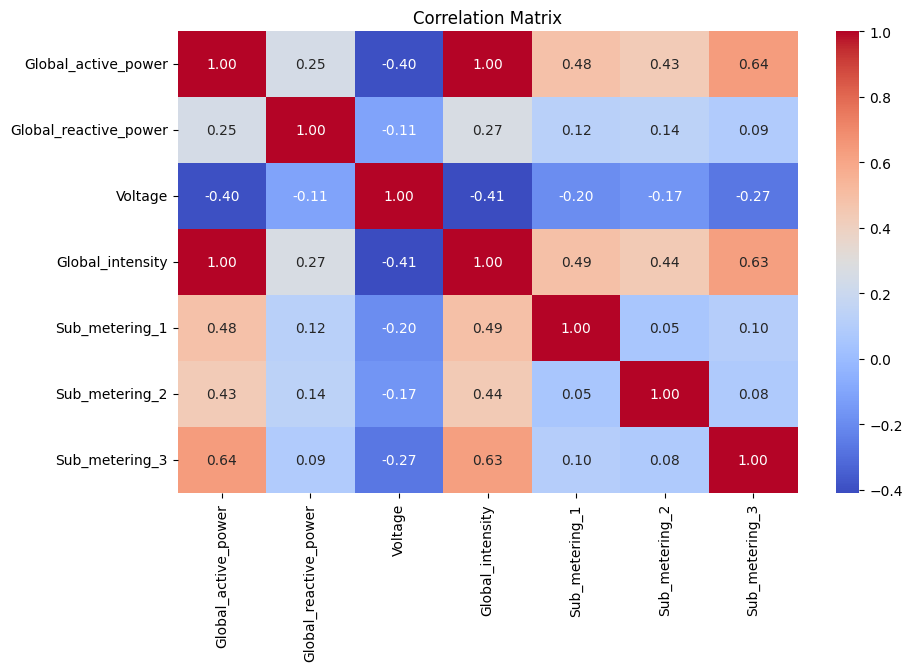

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define your continuous columns
conti_col = [
    'Global_active_power',
    'Global_reactive_power',
    'Voltage',
    'Global_intensity',
    'Sub_metering_1',
    'Sub_metering_2',
    'Sub_metering_3'
]

# Compute correlation matrix for those columns
corr_matrix = df[conti_col].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


In [ ]:
Q1 = df['Global_active_power'].quantile(0.25)
Q3 = df['Global_active_power'].quantile(0.75)
IQR = Q3 - Q1

# Outliers threshold
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df['Global_active_power'] < lower_bound) | (df['Global_active_power'] > upper_bound)]
print(outliers.count())

In [27]:
from scipy.stats import zscore

z_scores = df[['Global_active_power', 'Voltage', 'Global_intensity']].apply(zscore)
outliers = (z_scores.abs() > 3)  # commonly used threshold
print(outliers.sum())  # Number of outliers per column


Global_active_power    36877
Voltage                13385
Global_intensity       37434
dtype: int64


In [28]:
Q1 = df['Global_active_power'].quantile(0.25)
Q3 = df['Global_active_power'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Global_active_power'] < (Q1 - 1.5 * IQR)) |
              (df['Global_active_power'] > (Q3 + 1.5 * IQR))]


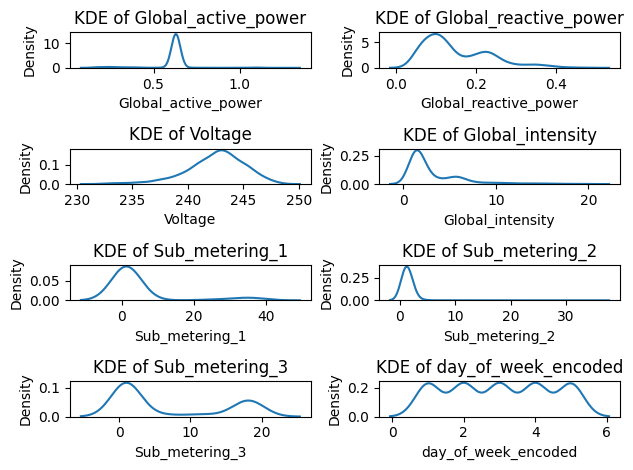

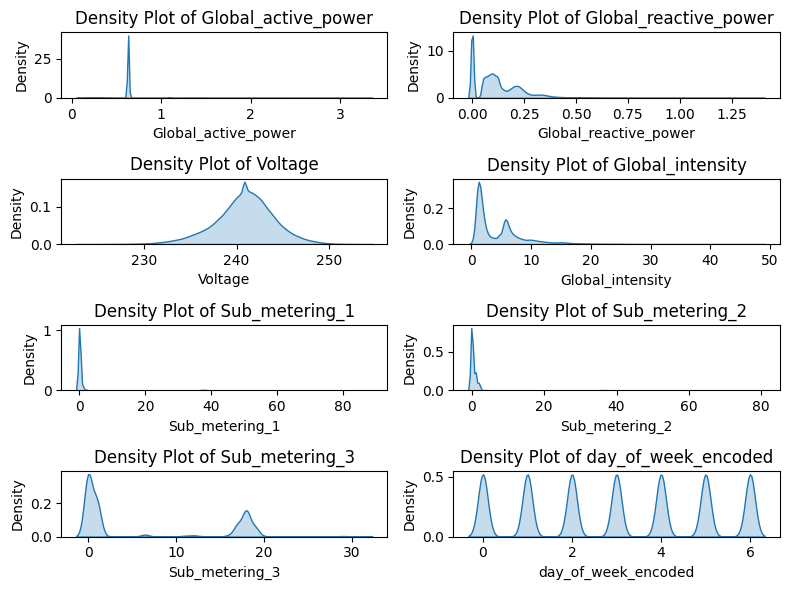

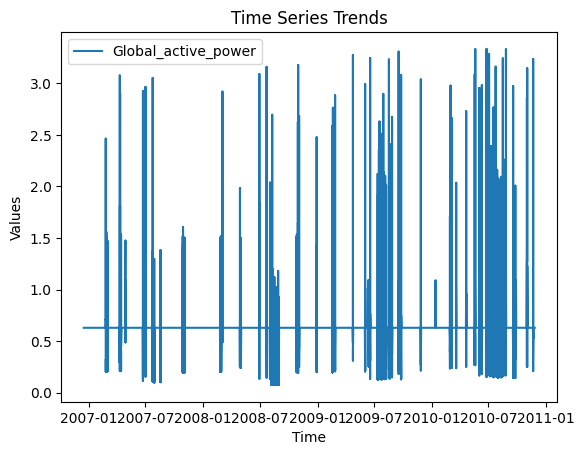

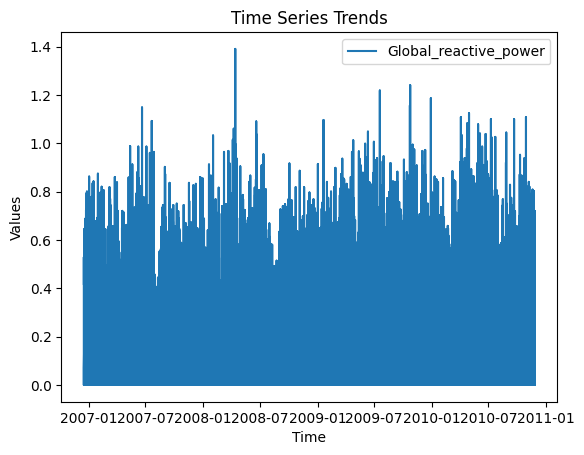

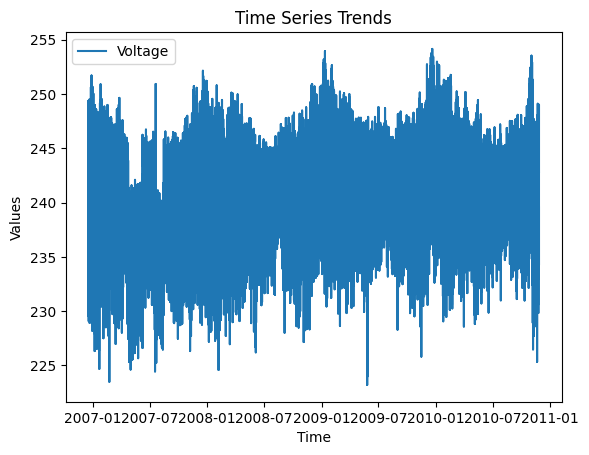

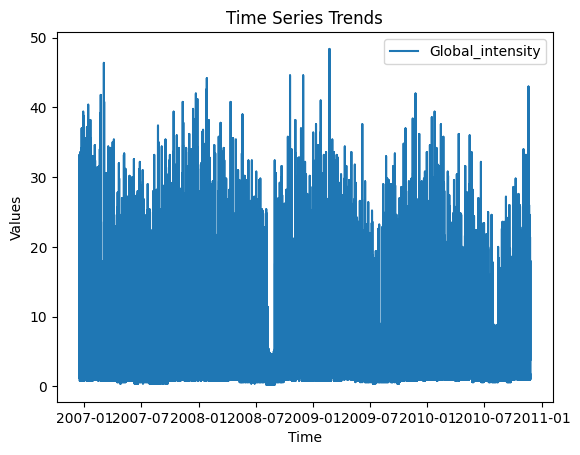

In [32]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
clean_df = df[numerical_cols].dropna()
clean_df = clean_df[(clean_df < clean_df.quantile(0.99)) & (clean_df > clean_df.quantile(0.01))]
clean_df = clean_df[~clean_df.index.duplicated(keep='first')]


for i, col in enumerate(numerical_cols, 1):
    plt.subplot((len(numerical_cols) + 1) // 2, 2, i)
    sns.kdeplot(x=clean_df[col])
    plt.title(f'KDE of {col}')
plt.tight_layout()


# KDE plots for distribution
plt.figure(figsize=(8, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot((len(numerical_cols) + 1) // 2, 2, i)
    sns.kdeplot(df[col], fill=True)
    plt.title(f'Density Plot of {col}')
plt.tight_layout()
plt.show()

for col in numerical_cols[:4]:  # limit to first 4 for readability
  plt.plot(df.index, df[col], label=col)
  plt.legend()
  plt.title("Time Series Trends")
  plt.xlabel("Time")
  plt.ylabel("Values")
  plt.show()


In [ ]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Assuming your cleaned dataframe is named clean_df
# You can adjust the column list if needed
numerical_cols = [
    'Global_active_power',
    'Global_reactive_power',
    'Voltage',
    'Global_intensity',
    'Sub_metering_1',
    'Sub_metering_2',
    'Sub_metering_3',
    'day_of_week_encoded'
]

# Compute skewness and kurtosis
skew_kurt_df = pd.DataFrame({
    'Skewness': clean_df[numerical_cols].apply(skew, nan_policy='omit'),
    'Kurtosis': clean_df[numerical_cols].apply(kurtosis, nan_policy='omit')
})

# Display results
print(skew_kurt_df)


In [ ]:
clean_df

In [27]:
df.to_csv("processed_power_data.csv", index=False)


In [33]:
import pandas as pd

# Step 3: Convert relevant columns to numeric
numeric_cols = [
    'Global_active_power', 'Global_reactive_power', 'Voltage',
    'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'
]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Converts strings to float, invalid entries to NaN


# Step 5: Daily statistics
df['daily_avg_power'] = df.groupby('Date')['Global_active_power'].transform('mean')
df['daily_max_power'] = df.groupby('Date')['Global_active_power'].transform('max')
df['daily_min_power'] = df.groupby('Date')['Global_active_power'].transform('min')

df.sort_index(inplace=True)

# Step 6: Rolling average (1 hour = 60 minutes if data is 1 min resolution)
df['rolling_avg_power_60min'] = df['Global_active_power'].rolling('60min').mean()

# Step 7: Peak hour indicator
df['hour'] = df.index.hour
df['is_peak_hour'] = df['hour'].isin(range(18, 22)).astype(int)  # e.g., 6pm–9pm as peak

# Step 8: Normalize selected columns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [40]:
df

,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day_of_week,day,...,Minute,day_of_week_encoded,daily_avg_power,daily_max_power,daily_min_power,rolling_avg_power_60min,is_weekend,working_hour,power_diff,load_ratio
Date,,,,,,,,,,,,,,,,,,,,,
2006-12-16,1900-01-01 17:24:00,0.63,0.418,234.84,18.4,0.0,1.0,17.0,Saturday,16,...,24,5,0.63,0.63,0.63,0.63,1,0,0.212,0.034239
2006-12-16,1900-01-01 17:25:00,0.63,0.436,233.63,23.0,0.0,1.0,16.0,Saturday,16,...,25,5,0.63,0.63,0.63,0.63,1,0,0.194,0.027391
2006-12-16,1900-01-01 17:26:00,0.63,0.498,233.29,23.0,0.0,2.0,17.0,Saturday,16,...,26,5,0.63,0.63,0.63,0.63,1,0,0.132,0.027391
2006-12-16,1900-01-01 17:27:00,0.63,0.502,233.74,23.0,0.0,1.0,17.0,Saturday,16,...,27,5,0.63,0.63,0.63,0.63,1,0,0.128,0.027391
2006-12-16,1900-01-01 17:28:00,0.63,0.528,235.68,15.8,0.0,1.0,17.0,Saturday,16,...,28,5,0.63,0.63,0.63,0.63,1,0,0.102,0.039873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-11-26,1900-01-01 20:58:00,0.63,0.000,240.43,4.0,0.0,0.0,0.0,Friday,26,...,58,4,0.63,0.63,0.63,0.63,0,0,0.630,0.157500
2010-11-26,1900-01-01 20:59:00,0.63,0.000,240.00,4.0,0.0,0.0,0.0,Friday,26,...,59,4,0.63,0.63,0.63,0.63,0,0,0.630,0.157500
2010-11-26,1900-01-01 21:00:00,0.63,0.000,239.82,3.8,0.0,0.0,0.0,Friday,26,...,0,4,0.63,0.63,0.63,0.63,0,0,0.630,0.165789


In [39]:
df.drop(columns=['hour','is_peak_hour'],inplace=True)

In [41]:
df.to_csv("power_data_more.csv", index=False)


In [44]:
df['working_hour'].nunique
df.drop(columns=['working_hour'],inplace=True)

In [ ]:
# Example feature engineering

df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')


In [37]:
df['power_diff'] = df['Global_active_power'] - df['Global_reactive_power']
df['load_ratio'] = df['Global_active_power'] / df['Global_intensity']


In [33]:
# Convert 'Time' to time only (if it's datetime)
df['Time'] = pd.to_datetime(df['Time']).dt.time

# Convert 'date' to datetime (if it's not already)
df['date'] = pd.to_datetime(df['date'])

# Set 'date' as the index
df.set_index('date', inplace=True)


In [34]:
df.to_csv("processed_power_data.csv", index=False)


C:\Users\pavit\AppData\Local\Temp\ipykernel_23088\564438595.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['Time'].astype(str))
C:\Users\pavit\AppData\Local\Temp\ipykernel_23088\564438595.py:20: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_df = df.resample('H').mean(numeric_only=True)


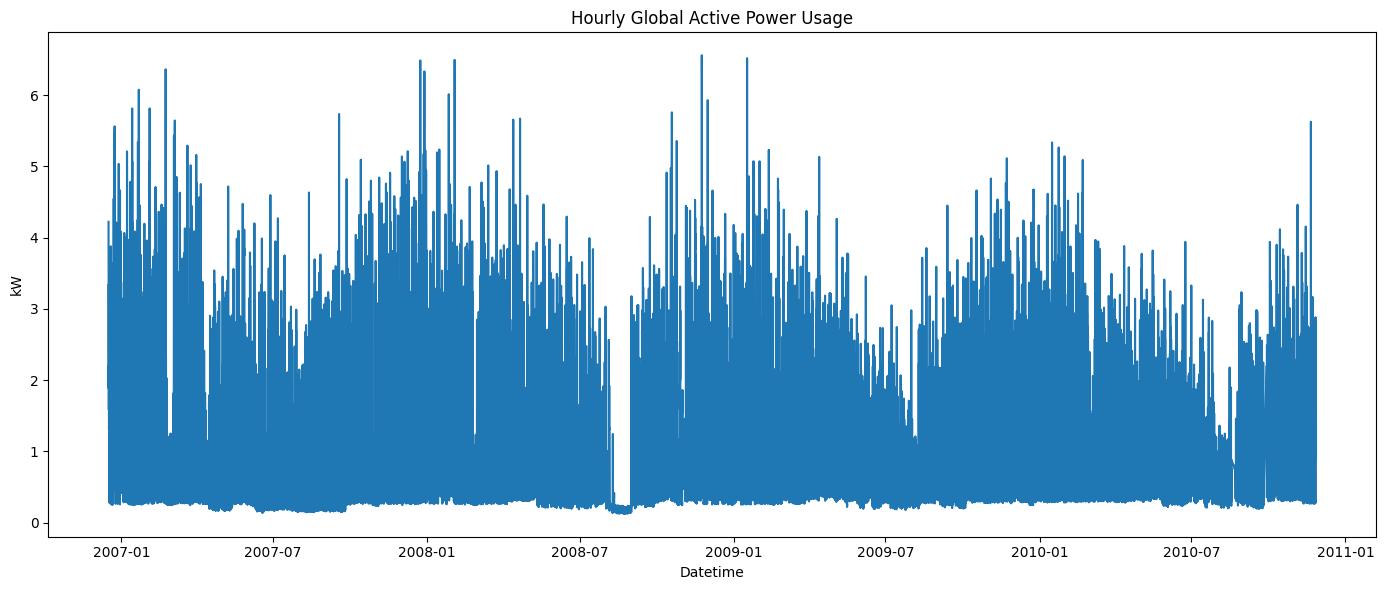

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Reset index if datetime is stored in the index
if df.index.name is not None:
    df = df.reset_index()

# Step 2: Ensure both 'date' and 'Time' columns exist
if 'date' in df.columns and 'Time' in df.columns:
    df['Datetime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['Time'].astype(str))
    df.set_index('Datetime', inplace=True)
elif 'Datetime' in df.columns:
    df['Datetime'] = pd.to_datetime(df['Datetime'])
    df.set_index('Datetime', inplace=True)
else:
    raise KeyError("Expected columns 'date' and 'Time' or 'Datetime' are missing.")

# Step 3: Resample data hourly
hourly_df = df.resample('H').mean(numeric_only=True)

# Step 4: Plot energy usage trends
plt.figure(figsize=(14, 6))
sns.lineplot(data=hourly_df['Global_active_power'])
plt.title('Hourly Global Active Power Usage')
plt.xlabel('Datetime')
plt.ylabel('kW')
plt.tight_layout()
plt.show()





C:\Users\pavit\AppData\Local\Temp\ipykernel_23088\4084959879.py:20: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_df = numeric_df.resample('H').mean()


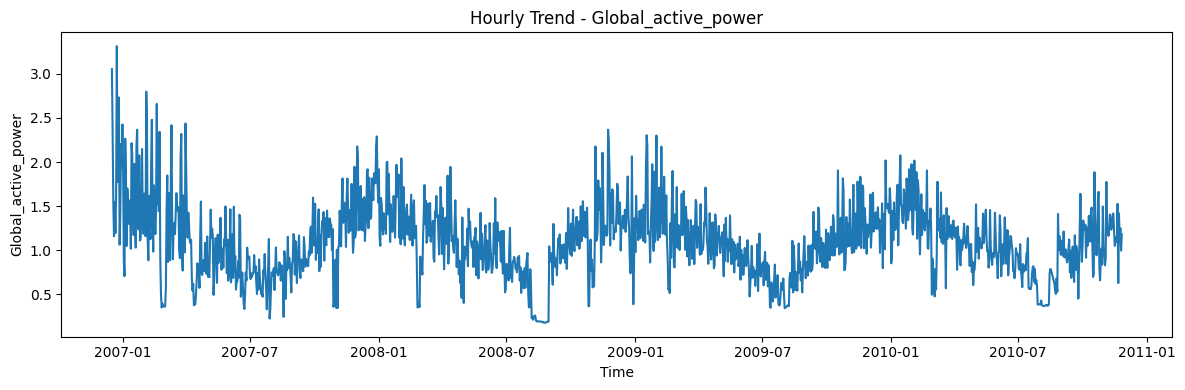

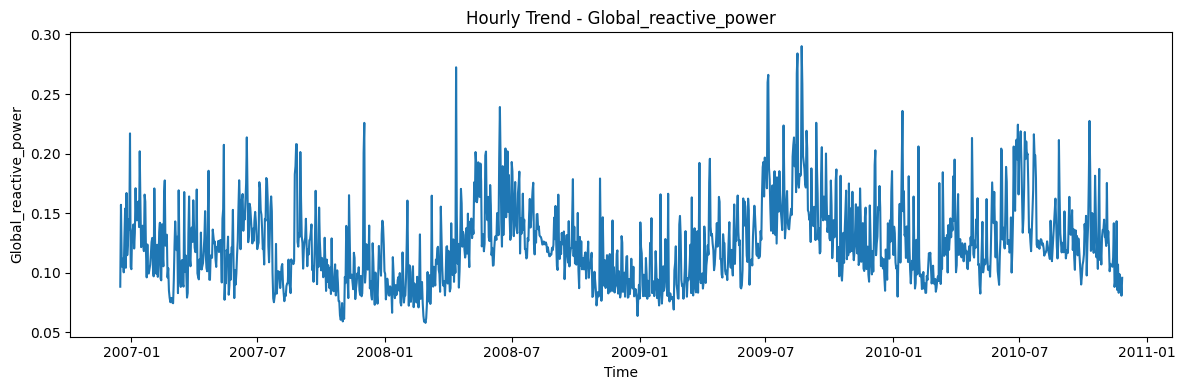

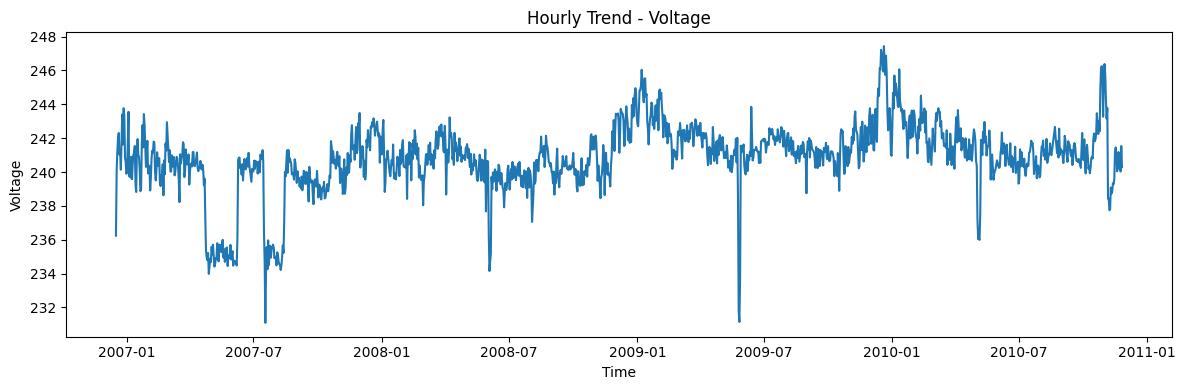

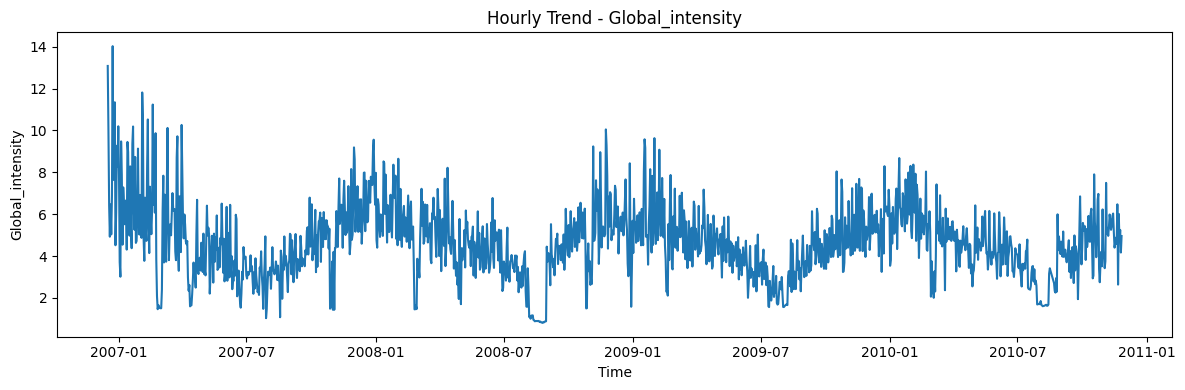

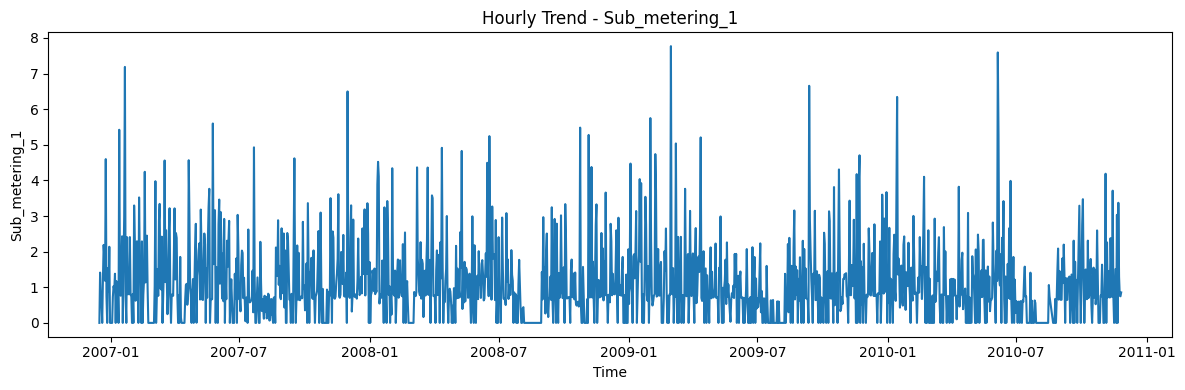

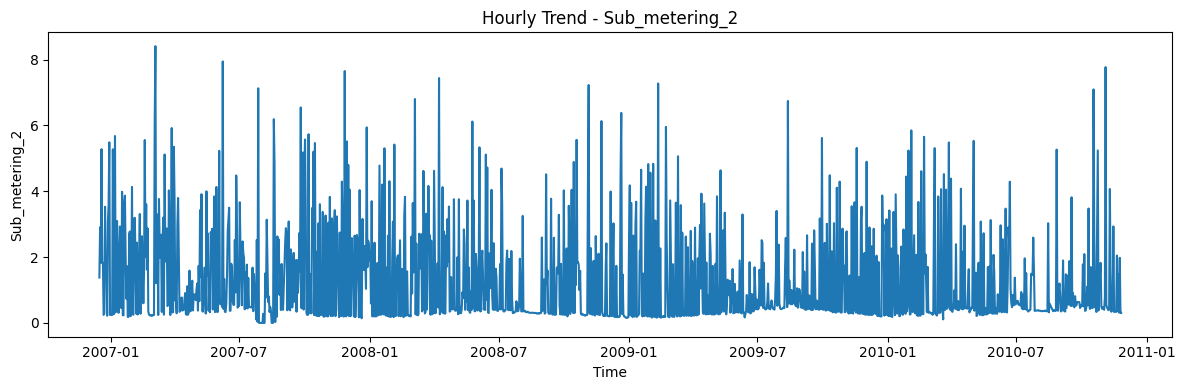

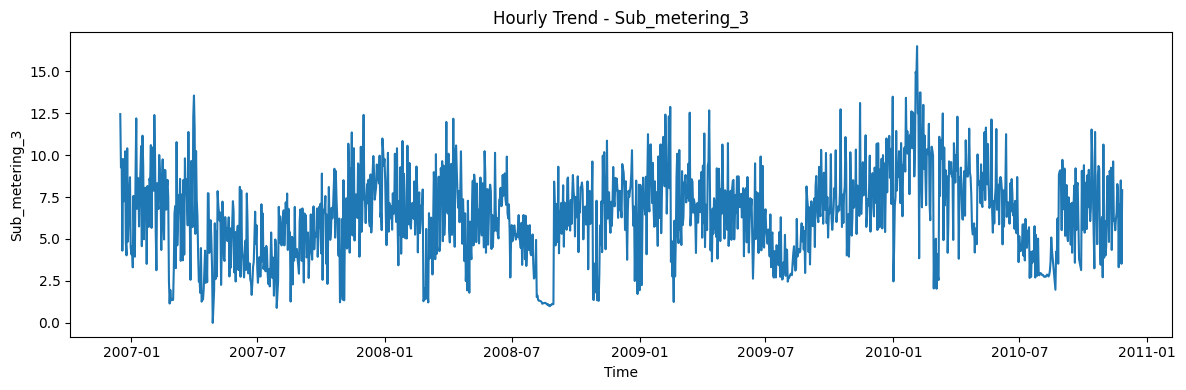

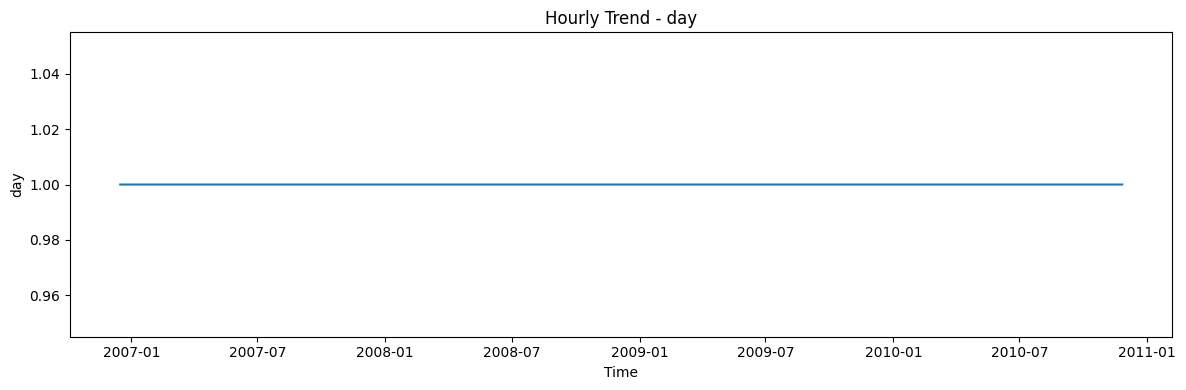

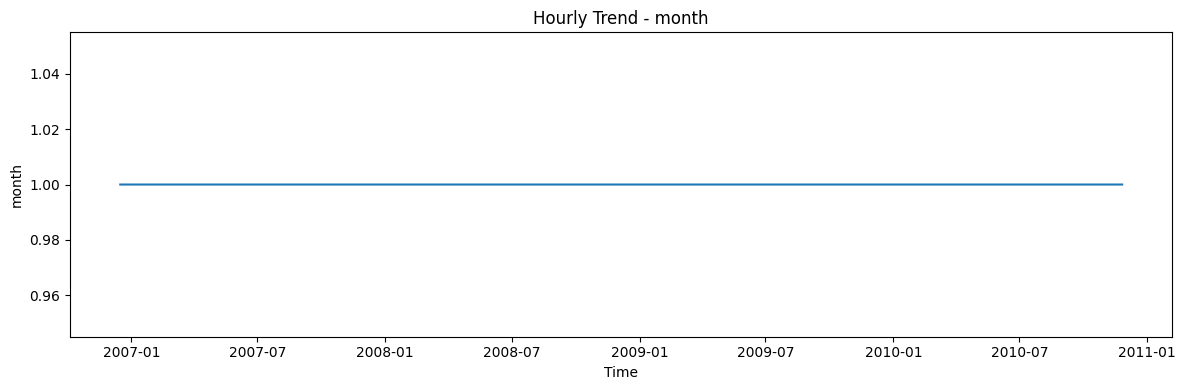

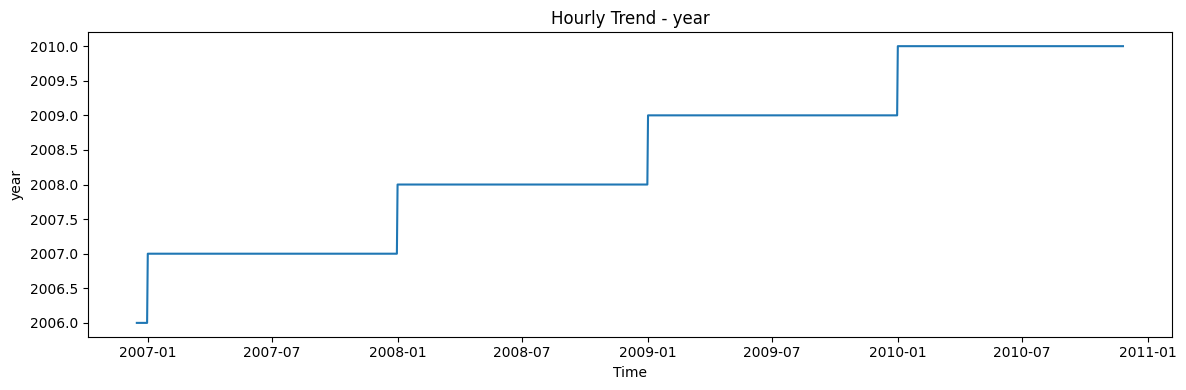

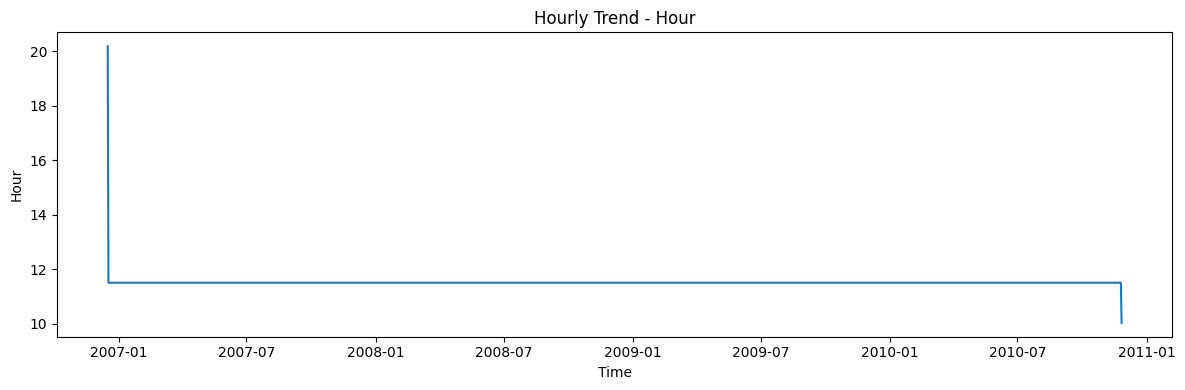

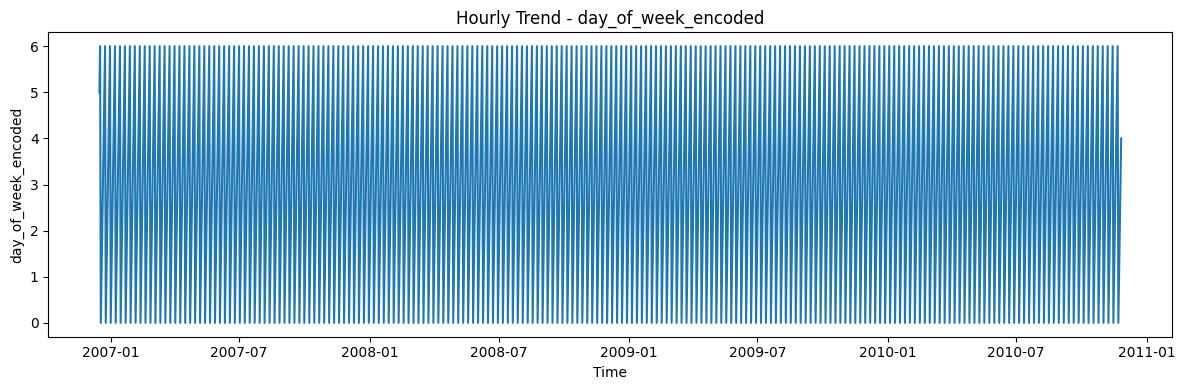

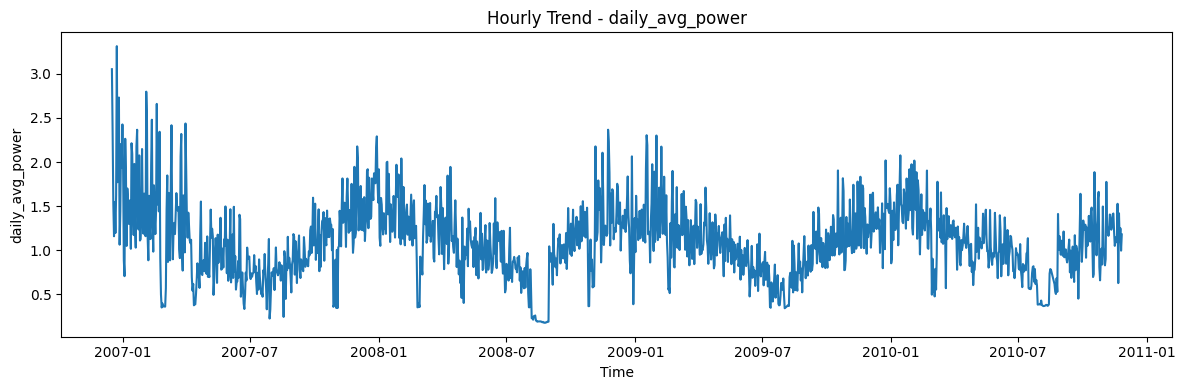

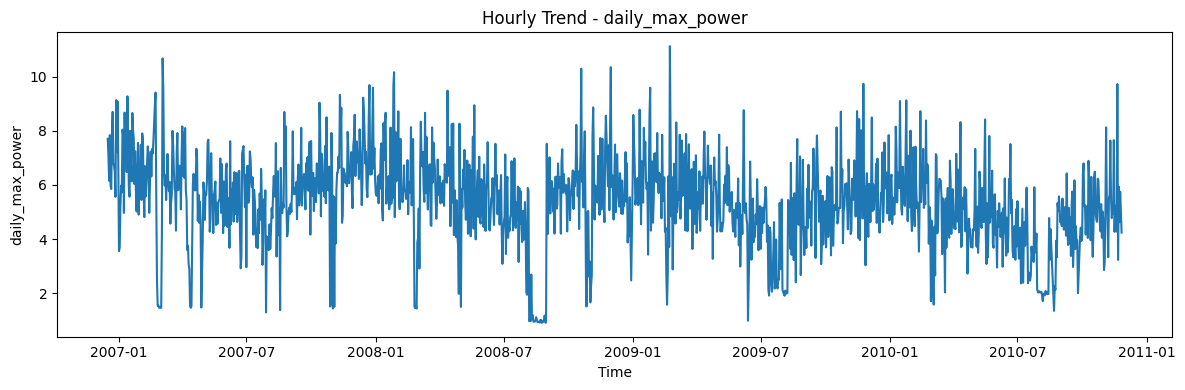

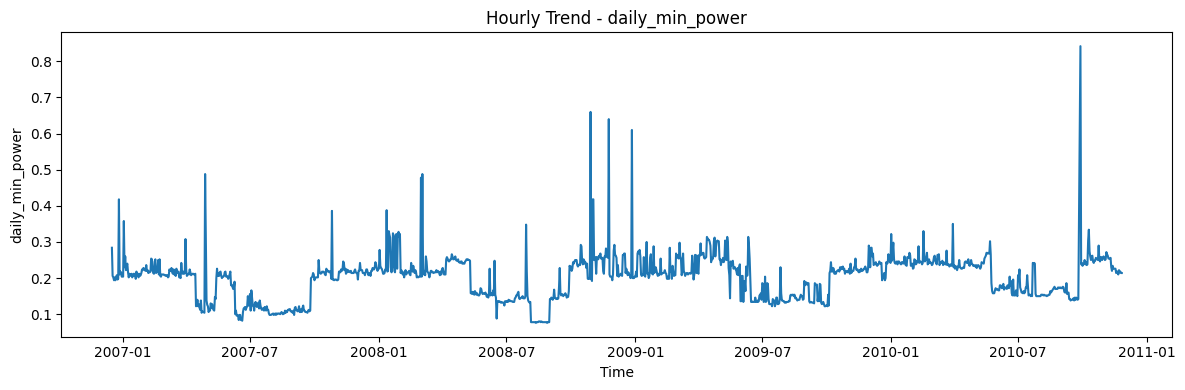

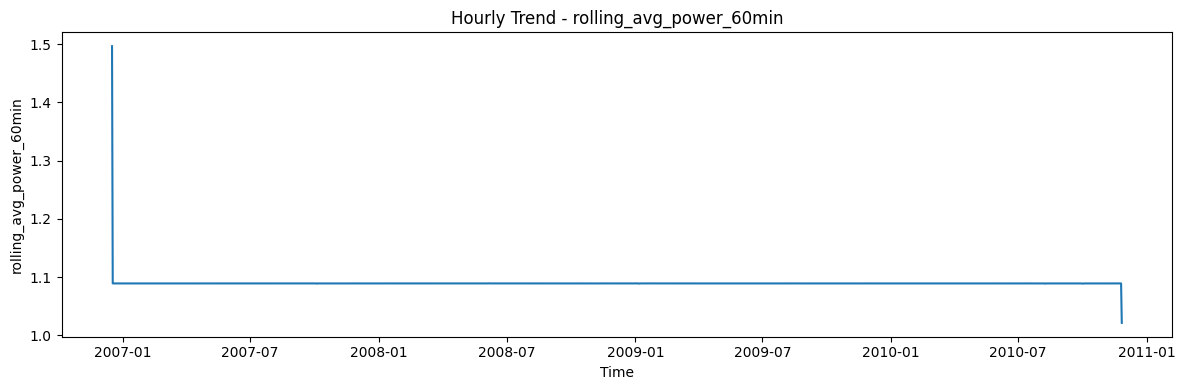

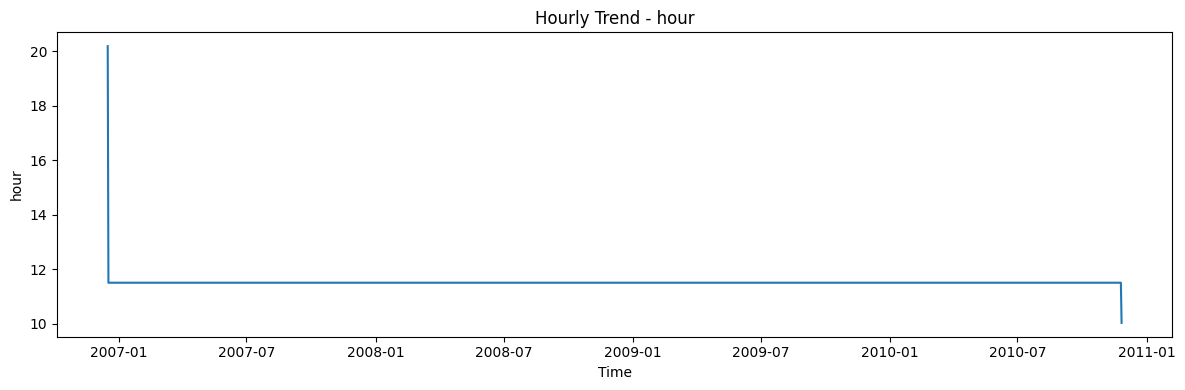

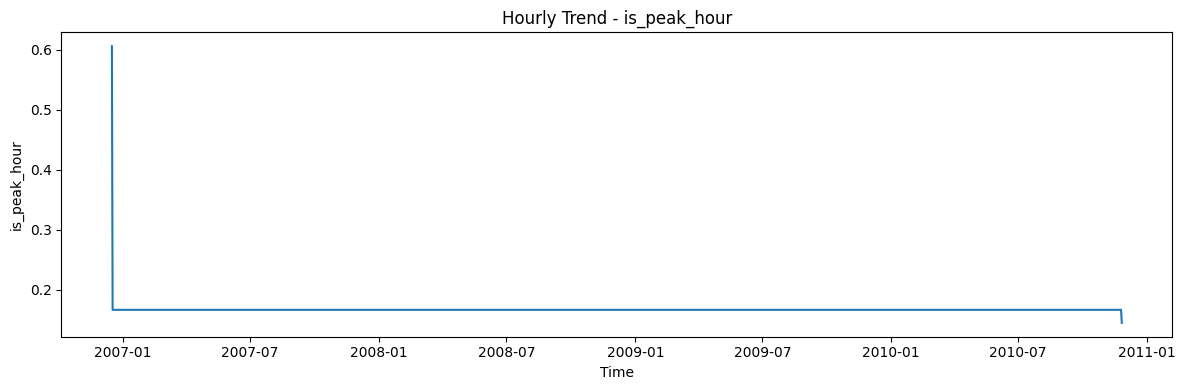

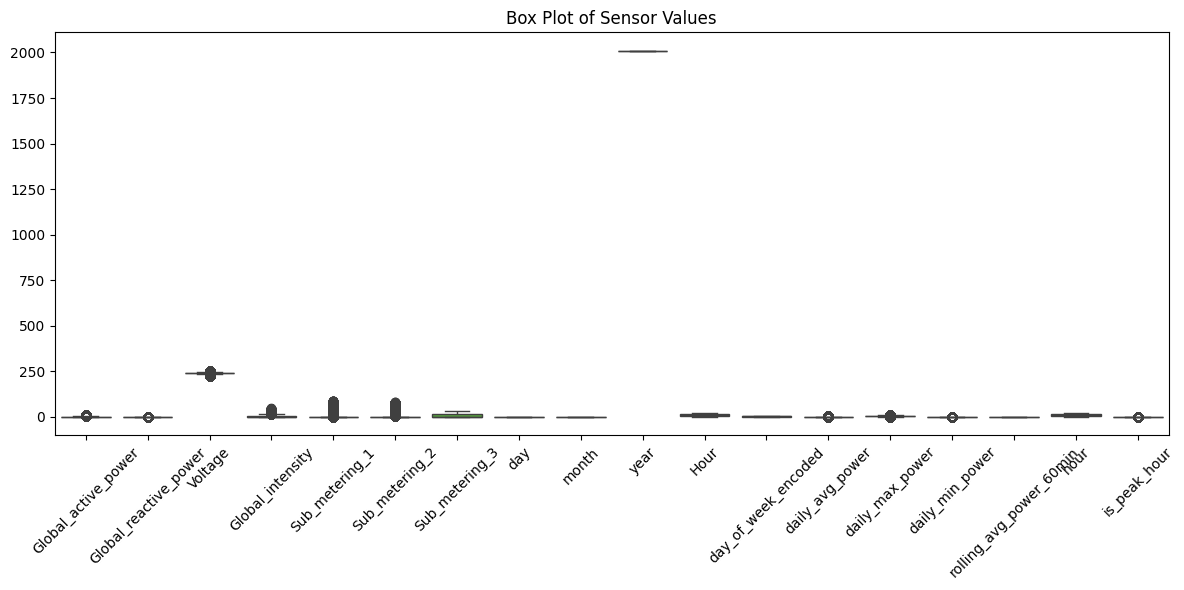

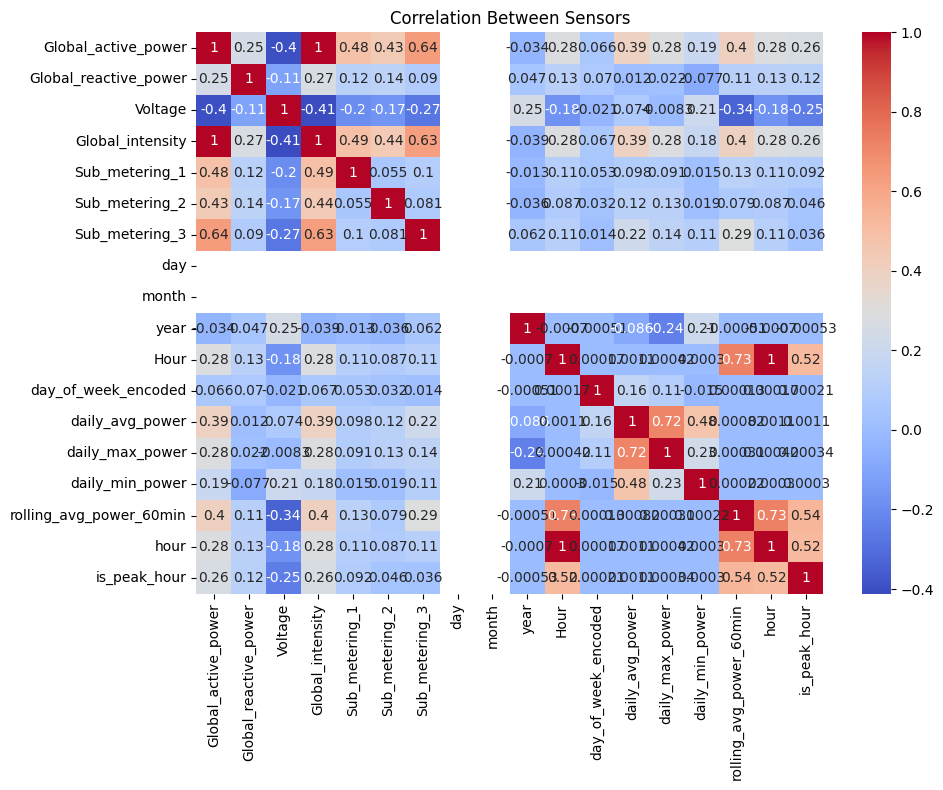

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess
df = pd.read_csv(r'C:\Users\pavit\OneDrive\Documents\power_pulse_proj\processed_power_data.csv')

# Detect datetime column
datetime_col = next((col for col in df.columns if 'time' in col.lower() or 'date' in col.lower()), None)
if not datetime_col:
    raise ValueError("No datetime-related column found.")

df[datetime_col] = pd.to_datetime(df[datetime_col])
df.set_index(datetime_col, inplace=True)

# Numeric-only data
numeric_df = df.select_dtypes(include='number')

# Resample to hourly mean
hourly_df = numeric_df.resample('H').mean()

# 1. Line plots for each numeric column (hourly trends)
for col in hourly_df.columns:
    plt.figure(figsize=(12, 4))
    sns.lineplot(data=hourly_df[col])
    plt.title(f'Hourly Trend - {col}')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# 2. Box plot to check distribution & outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_df)
plt.title('Box Plot of Sensor Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Correlation heatmap
plt.figure(figsize=(10, 8))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Sensors')
plt.tight_layout()
plt.show()



In [47]:
from sklearn.model_selection import train_test_split

# Define your features (X) and target (y)
features = ['is_weekend','power_diff', 'load_ratio']
X = df[features]
y = df['Global_active_power']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Remove rows where y (target) is NaN
df = df.dropna(subset=['Global_active_power'])

# Define features and target
features = ['is_weekend','power_diff', 'load_ratio']
X = df[features]
y = df['Global_active_power']


In [49]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Example: Assuming your feature matrix is X and target is y
# X, y = df.drop('target_column', axis=1), df['target_column']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define pipelines
pipelines = {
    'Linear Regression': Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('model', LinearRegression())
    ]),
    'Random Forest': Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('model', RandomForestRegressor(random_state=42))
    ]),
    'Gradient Boosting': Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('model', GradientBoostingRegressor(random_state=42))
    ])
}

# Train and evaluate each model
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} MSE: {mse:.4f}")


Linear Regression MSE: 0.0083
Random Forest MSE: 0.0003
Gradient Boosting MSE: 0.0011


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load CSV with mixed types warning handled
file_path = r"C:\Users\pavit\OneDrive\Documents\power_pulse_proj\processed_power_data.csv"
df = pd.read_csv(file_path, low_memory=False)

# Optional: convert columns with mixed types to numeric, forcing errors to NaN
cols_to_convert = ['Voltage', 'Sub_metering_1', 'Sub_metering_2']
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing values (can also try imputing)
df.dropna(inplace=True)

# Define target and features
target = 'load_ratio'  # change this if needed
X = df.drop(columns=[target])
y = df[target]

# Drop non-numeric columns or encode them
X = X.select_dtypes(include=[np.number])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model
model = RandomForestRegressor(random_state=42)

# Define hyperparameter grid
param_dist = {
    'n_estimators': [25, 50, 60],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Randomized Search for best parameters
search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

search.fit(X_train, y_train)

# Best model and results
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Hyperparameters:", search.best_params_)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
file_path = r"C:\Users\pavit\OneDrive\Documents\power_pulse_proj\processed_power_data.csv"
df = pd.read_csv(file_path)

# Drop non-numeric columns (e.g., time or string)
df_numeric = df.select_dtypes(include=[np.number])

# Fill missing values with column mean
df_numeric = df_numeric.fillna(df_numeric.mean()) 

# Check after cleanup
print("Final columns used:", df_numeric.columns.tolist())

# Set features and target (last column as target)
X = df_numeric.iloc[:, :-1]
y = df_numeric.iloc[:, -1]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Evaluate each model
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "RMSE": rmse,
        "MAE": mae,
        "R²": r2
    })

# Results summary
results_df = pd.DataFrame(results).sort_values(by="RMSE")
print("\nModel Evaluation Results:")
print(results_df)

# Best model
best_model = results_df.iloc[0]["Model"]
print(f"\n✅ Best Performing Model: {best_model}")


C:\Users\pavit\AppData\Local\Temp\ipykernel_5856\4078394987.py:11: DtypeWarning: Columns (3,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Final columns used: ['Global_active_power', 'Global_reactive_power', 'Global_intensity', 'Sub_metering_3', 'day', 'month', 'year', 'Hour', 'Minute', 'daily_avg', 'daily_max', 'daily_min', 'day_of_week_encoded', 'hour', 'is_weekend', 'working_hour', 'power_diff', 'load_ratio']

Model Evaluation Results:
               Model      RMSE       MAE        R²
2      Random Forest  0.000743  0.000175  0.998775
1      Decision Tree  0.001257  0.000252  0.996496
0  Linear Regression  0.016260  0.008858  0.413445

✅ Best Performing Model: Random Forest
